In [1]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from joblib import dump, load
from os import path
from sklearn import metrics

In [2]:
time_precision = 4   # jagame päeva xh suurusteks plokkideks


X_train = pd.read_csv("../../data/X_train.csv")
X_train = X_train.apply(pd.to_numeric, errors='ignore', downcast='integer')
X_train.ToimAeg = X_train.ToimAeg.values.astype('datetime64[D]')
X_train.ToimAeg = X_train['ToimAeg'].apply(lambda x: x.replace(hour=x.hour-x.hour%time_precision, minute=0, second=0))
X_train["Aasta"] = X_train['ToimAeg'].dt.year
X_train["Kuu"] = X_train['ToimAeg'].dt.month
X_train["Päev"] = X_train['ToimAeg'].dt.day
X_train["Tund"] = X_train['ToimAeg'].dt.hour
X_train.drop(columns="ToimAeg", inplace=True)
X_train = X_train.apply(pd.to_numeric, errors='ignore', downcast='integer')
X_train.head()

y_train = pd.read_csv("../../data/y_train.csv")
y_train = y_train.apply(pd.to_numeric, errors='ignore', downcast='integer')
y_train.head()

X_valid = pd.read_csv("../../data/X_valid.csv")
X_valid = X_valid.apply(pd.to_numeric, errors='ignore', downcast='integer')
X_valid.ToimAeg = X_valid.ToimAeg.values.astype('datetime64[D]')
X_valid.ToimAeg = X_valid['ToimAeg'].apply(lambda x: x.replace(hour=x.hour-x.hour%time_precision, minute=0, second=0))
X_valid["Aasta"] = X_valid['ToimAeg'].dt.year
X_valid["Kuu"] = X_valid['ToimAeg'].dt.month
X_valid["Päev"] = X_valid['ToimAeg'].dt.day
X_valid["Tund"] = X_valid['ToimAeg'].dt.hour
X_valid.drop(columns="ToimAeg", inplace=True)
X_valid = X_valid.apply(pd.to_numeric, errors='ignore', downcast='integer')
X_valid.head()

y_valid = pd.read_csv("../../data/y_valid.csv")
y_valid = y_valid.apply(pd.to_numeric, errors='ignore', downcast='integer')
y_valid.head()

X_train.head()

y_train.info()
y_train.drop(columns=["Kahjusumma","Koht"], inplace=True)
y_valid.drop(columns=["Kahjusumma", "Koht"], inplace=True)
y_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62476 entries, 0 to 62475
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   LIIK_AVALIKU_KORRA_RIKKUMINE   62476 non-null  int8  
 1   LIIK_JALGRATTA_MOPEEDI_VARGUS  62476 non-null  int8  
 2   LIIK_KEHALINE_VAARKOHTLEMINE   62476 non-null  int8  
 3   LIIK_KELMUS                    62476 non-null  int8  
 4   LIIK_KONFLIKT/OMAVOLI          62476 non-null  int8  
 5   LIIK_KOOLIVAGIVALD             62476 non-null  int8  
 6   LIIK_LIIKLUSRIKKUMINE          62476 non-null  int8  
 7   LIIK_MOOTORSOIDUKI_VARGUS      62476 non-null  int8  
 8   LIIK_MUU                       62476 non-null  int8  
 9   LIIK_PISIVARGUS                62476 non-null  int8  
 10  LIIK_ROOVIMINE                 62476 non-null  int8  
 11  LIIK_TULEKAHJU                 62476 non-null  int8  
 12  LIIK_VANDALISM                 62476 non-null  int8  
 13  L

,LIIK_AVALIKU_KORRA_RIKKUMINE,LIIK_JALGRATTA_MOPEEDI_VARGUS,LIIK_KEHALINE_VAARKOHTLEMINE,LIIK_KELMUS,LIIK_KONFLIKT/OMAVOLI,LIIK_KOOLIVAGIVALD,LIIK_LIIKLUSRIKKUMINE,LIIK_MOOTORSOIDUKI_VARGUS,LIIK_MUU,LIIK_PISIVARGUS,LIIK_ROOVIMINE,LIIK_TULEKAHJU,LIIK_VANDALISM,LIIK_VARGUS
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
xgb_models = list()
for col in y_train.columns:
    xgb_models.append(XGBClassifier().fit(X_train, y_train[col]))

In [4]:
for col, model in list(zip(y_valid.columns, xgb_models)):
    print(metrics.roc_auc_score(y_valid[col], model.predict(X_valid)), col, sep="\t")

0.8071705797022871	LIIK_AVALIKU_KORRA_RIKKUMINE
0.5517125707380529	LIIK_JALGRATTA_MOPEEDI_VARGUS
0.5671801887033675	LIIK_KEHALINE_VAARKOHTLEMINE
0.523062664326911	LIIK_KELMUS
0.5151515151515151	LIIK_KONFLIKT/OMAVOLI
0.8233369066312356	LIIK_KOOLIVAGIVALD
0.4999359220812508	LIIK_LIIKLUSRIKKUMINE
0.5125631125631126	LIIK_MOOTORSOIDUKI_VARGUS
0.5180357519958971	LIIK_MUU
0.7760016091201657	LIIK_PISIVARGUS
0.49980564913189945	LIIK_ROOVIMINE
0.5	LIIK_TULEKAHJU
0.5303005238489109	LIIK_VANDALISM
0.6922840668900925	LIIK_VARGUS


In [5]:
# find best cutoff
def applyCutoff(df, cutoff):
    a = df.copy()
    for col in a.columns:
        a[col] = a[col].apply(lambda x: 1 if x > cutoff else 0)
    return a
max_acc = {col:-1 for col in y_valid.columns}
max_acc_cut = {col:-1 for col in y_valid.columns}
for col, model in list(zip(y_valid.columns, xgb_models)):
    temp = pd.DataFrame(model.predict(X_valid))
    for i in np.arange(0.3, 0.8, 0.01):
        temp_cut = applyCutoff(temp, i)
        if metrics.accuracy_score(y_valid[col], temp_cut) > max_acc[col]:
            max_acc[col] = metrics.accuracy_score(y_valid[col], temp_cut)
            max_acc_cut[col] = i
print(max_acc)
print(max_acc_cut)

{'LIIK_AVALIKU_KORRA_RIKKUMINE': 0.9491612242284544, 'LIIK_JALGRATTA_MOPEEDI_VARGUS': 0.9751568702778844, 'LIIK_KEHALINE_VAARKOHTLEMINE': 0.9669611986169804, 'LIIK_KELMUS': 0.9943654757331284, 'LIIK_KONFLIKT/OMAVOLI': 0.9959021641695479, 'LIIK_KOOLIVAGIVALD': 0.9988474836726854, 'LIIK_LIIKLUSRIKKUMINE': 0.9991035984120886, 'LIIK_MOOTORSOIDUKI_VARGUS': 0.9946215904725317, 'LIIK_MUU': 0.9624791906774235, 'LIIK_PISIVARGUS': 0.8130362402356256, 'LIIK_ROOVIMINE': 0.9879626072480471, 'LIIK_TULEKAHJU': 0.9987194263029837, 'LIIK_VANDALISM': 0.928031758227686, 'LIIK_VARGUS': 0.6916378537584839}
{'LIIK_AVALIKU_KORRA_RIKKUMINE': 0.3, 'LIIK_JALGRATTA_MOPEEDI_VARGUS': 0.3, 'LIIK_KEHALINE_VAARKOHTLEMINE': 0.3, 'LIIK_KELMUS': 0.3, 'LIIK_KONFLIKT/OMAVOLI': 0.3, 'LIIK_KOOLIVAGIVALD': 0.3, 'LIIK_LIIKLUSRIKKUMINE': 0.3, 'LIIK_MOOTORSOIDUKI_VARGUS': 0.3, 'LIIK_MUU': 0.3, 'LIIK_PISIVARGUS': 0.3, 'LIIK_ROOVIMINE': 0.3, 'LIIK_TULEKAHJU': 0.3, 'LIIK_VANDALISM': 0.3, 'LIIK_VARGUS': 0.3}


In [6]:
# best cutoff is where sum(frequency*cutof)/all
summa = 0
for col in y_valid.columns:
    summa += max_acc_cut[col] * sum(y_valid[col])
print(summa/y_valid.shape[0])
# best is 0.6015840696632094, although we can use separate cutoffs for everyone, but to lazy

0.32746830580099884


In [7]:
# accuracies
for col, model in list(zip(y_valid.columns, xgb_models)):
    print(metrics.accuracy_score(y_valid[col], applyCutoff(pd.DataFrame(model.predict(X_valid)), max_acc_cut[col])), col, sep="\t")

0.9491612242284544	LIIK_AVALIKU_KORRA_RIKKUMINE
0.9751568702778844	LIIK_JALGRATTA_MOPEEDI_VARGUS
0.9669611986169804	LIIK_KEHALINE_VAARKOHTLEMINE
0.9943654757331284	LIIK_KELMUS
0.9959021641695479	LIIK_KONFLIKT/OMAVOLI
0.9988474836726854	LIIK_KOOLIVAGIVALD
0.9991035984120886	LIIK_LIIKLUSRIKKUMINE
0.9946215904725317	LIIK_MOOTORSOIDUKI_VARGUS
0.9624791906774235	LIIK_MUU
0.8130362402356256	LIIK_PISIVARGUS
0.9879626072480471	LIIK_ROOVIMINE
0.9987194263029837	LIIK_TULEKAHJU
0.928031758227686	LIIK_VANDALISM
0.6916378537584839	LIIK_VARGUS


In [8]:
for col, model in list(zip(y_valid.columns, xgb_models)):
    print(sum(model.predict(X_valid)), col, sep="\t")

613	LIIK_AVALIKU_KORRA_RIKKUMINE
37	LIIK_JALGRATTA_MOPEEDI_VARGUS
71	LIIK_KEHALINE_VAARKOHTLEMINE
5	LIIK_KELMUS
1	LIIK_KONFLIKT/OMAVOLI
14	LIIK_KOOLIVAGIVALD
1	LIIK_LIIKLUSRIKKUMINE
5	LIIK_MOOTORSOIDUKI_VARGUS
24	LIIK_MUU
2318	LIIK_PISIVARGUS
3	LIIK_ROOVIMINE
0	LIIK_TULEKAHJU
81	LIIK_VANDALISM
4027	LIIK_VARGUS


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarn

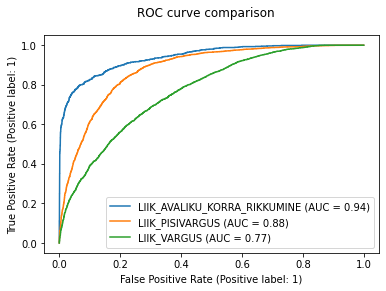

In [26]:
import matplotlib.pyplot as plt

fig = metrics.plot_roc_curve( xgb_models[0], X_valid, y_valid[y_valid.columns[0]], name="LIIK_AVALIKU_KORRA_RIKKUMINE")
fig = metrics.plot_roc_curve( xgb_models[9], X_valid, y_valid[y_valid.columns[9]],name="LIIK_PISIVARGUS", ax = fig.ax_)
fig = metrics.plot_roc_curve( xgb_models[13], X_valid, y_valid[y_valid.columns[13]],name="LIIK_VARGUS", ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")

plt.savefig("roc_curvess.png")
plt.show()

In [12]:
# dump theese model
for col, model in list(zip(y_valid.columns, xgb_models)):
    filename = col.replace("/", "")
    name = path.join("trained_models/xgbClassifier/", "xgbr_"+filename+".joblib")
    dump(model, filename=name, compress=3, protocol=5)